In [1]:
#importing python libraries 

import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore') # to supress seaborn warnings
pd.options.display.max_columns = None # Remove pandas display column number limit
import xlrd
import csv

# Connect and Fetch  Data

In [2]:
import pandas as pd
import pyodbc

server = 'ARJUN\SQLEXPRESS'
db = 'Insurance'

# Create the connection
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' +server+';DATABASE='+db+';Trusted_Connection=yes')

# query db
sql = """

select * from Insurance_data

"""
fulldata = pd.read_sql(sql, conn)
# displaying the dataframe
fulldata.head()

,CUSTOMER_NUM,COVERAGE_AMOUNT,GENDER,MARRIAGE,STATE,INSURANCE_TYPE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,18887.0,360000.0,2.0,1.0,7.0,4.0,46.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,18888.0,280000.0,1.0,1.0,4.0,3.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,126305.0,128888.0,123909.0,124078.0,124489.0,114110.0,4728.0,4700.0,4210.0,4455.0,4109.0,4000.0,1.0
2,18889.0,230000.0,1.0,1.0,6.0,3.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,43885.0,44926.0,45941.0,46853.0,47834.0,48942.0,1749.0,1764.0,1676.0,1735.0,1902.0,2189.0,0.0
3,18890.0,30000.0,2.0,2.0,1.0,4.0,24.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3055.0,18392.0,640.0,0.0,2583.0,4653.0,18407.0,640.0,0.0,2583.0,4653.0,2583.0,0.0
4,18891.0,70000.0,2.0,1.0,7.0,2.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,45738.0,36105.0,27484.0,28526.0,30053.0,30379.0,4016.0,2000.0,2000.0,2000.0,2000.0,2000.0,1.0


# Description of the Data

Customer_NUM--> Unique Identification

Coverage_amount-->Insurance premium is the amount of money that an individual or business must pay for an insurance policy

Gender (1 = male; 2 = female). 

Work (1 = IT Sector; 2 = Public Sector; 3 = Business; 4 = other Private Sector; 5=others)

Marital status (1 = married; 2 = single; 3 = others)

Insurance_type(1='Health',2='AccidentalDeath',3='Dental',4='LongTerm care' ,5='Vision')

State (1= 'California',2='Texas',3='New York',4='Nevada',5='Colorado','Texas','Michigan')

PAY_0,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6 -->Payment Delay

Bill_AMT1,Bill_AMT2,Bill_AMT3,Bill_AMT4,Bill_AMT5,Bill_AMT6--> Bill Amount Generated

PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6--> Amount paid by the customers

default payment, Y (Yes = 1, No = 0), as the response variable.


# Cleaning Data

In [3]:
#Checking null values in the dataframe
fulldata.isnull().values.any()

False

In [4]:
#no null values in our data

AttributeError: 'DataFrame' object has no attribute 'WORK'

In [6]:
fulldata['MARRIAGE'].value_counts()

2.0    15964
1.0    13659
3.0      323
0.0       54
Name: MARRIAGE, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000615505CC0>,
      dtype=object)

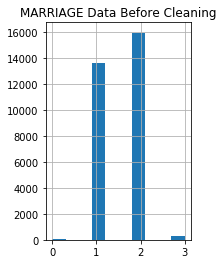

In [7]:
df =pd.DataFrame({'MARRIAGE Data Before Cleaning':fulldata.MARRIAGE})
df.hist(layout=(1,2))


In [8]:
fulldata.MARRIAGE[fulldata.MARRIAGE==0]='others'
fulldata.MARRIAGE[fulldata.MARRIAGE==1]='Single'
fulldata.MARRIAGE[fulldata.MARRIAGE==2]='Married'
fulldata.MARRIAGE[fulldata.MARRIAGE==3]='others'
fulldata.MARRIAGE.value_counts()

Married    15964
Single     13659
others       377
Name: MARRIAGE, dtype: int64

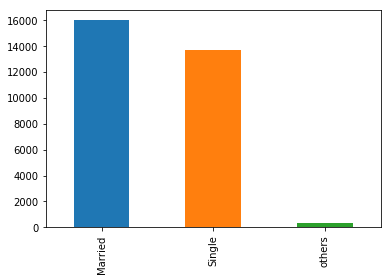

In [9]:
fulldata.MARRIAGE.value_counts().plot.bar()

In [12]:
fulldata.STATE[fulldata.STATE==1]='California'
fulldata.STATE[fulldata.STATE==2]='Texas'
fulldata.STATE[fulldata.STATE==3]='New York'
fulldata.STATE[fulldata.STATE==4]='Nevada'
fulldata.STATE[fulldata.STATE==5]='Colorado'
fulldata.STATE[fulldata.STATE==6]='Texas'
fulldata.STATE[fulldata.STATE==7]='Michigan'

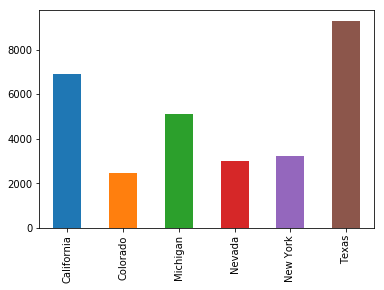

In [13]:
fulldata.STATE.value_counts().sort_index().plot.bar()

In [12]:
fulldata.INSURANCE_TYPE[fulldata.INSURANCE_TYPE==1]='LongTerm Care'
fulldata.INSURANCE_TYPE[fulldata.INSURANCE_TYPE==2]='Dental'
fulldata.INSURANCE_TYPE[fulldata.INSURANCE_TYPE==3]='Vision'
fulldata.INSURANCE_TYPE[fulldata.INSURANCE_TYPE==4]='Health'
fulldata.INSURANCE_TYPE[fulldata.INSURANCE_TYPE==5]='AccidentalDeath'


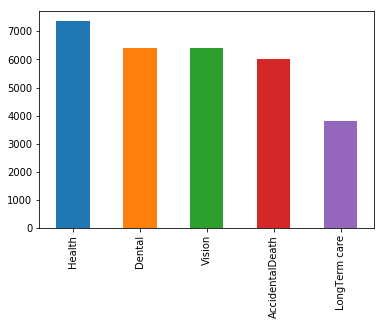

In [13]:
fulldata.INSURANCE_TYPE.value_counts().plot.bar()

In [16]:
fulldata.INSURANCE_TYPE.value_counts()

LongTerm care      7369
AccidentalDeath    6421
Dental             6397
Health             6019
Vision             3794
Name: INSURANCE_TYPE, dtype: int64

In [18]:
fulldata.GENDER.value_counts()

2.0    18112
1.0    11888
Name: GENDER, dtype: int64

In [19]:
fulldata.GENDER[fulldata.GENDER==1]='Female'
fulldata.GENDER[fulldata.GENDER==2]='Male'


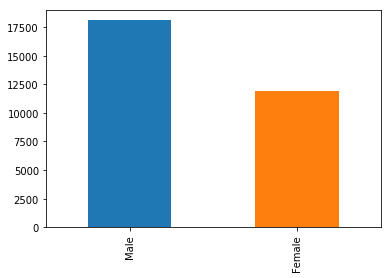

In [20]:
fulldata['GENDER'].value_counts().plot.bar()

In [21]:
fulldata.head()

,CUSTOMER_NUM,COVERAGE_AMOUNT,GENDER,MARRIAGE,STATE,INSURANCE_TYPE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,11111.0,20000.0,Male,Single,Michigan,Health,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,11112.0,120000.0,Male,Married,Texas,AccidentalDeath,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,11113.0,90000.0,Male,Married,Texas,AccidentalDeath,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,11114.0,50000.0,Male,Single,Michigan,Health,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,11115.0,50000.0,Female,Single,Nevada,Health,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [22]:
fulldata[['GENDER','MARRIAGE','STATE','INSURANCE_TYPE']].describe()

,GENDER,MARRIAGE,STATE,INSURANCE_TYPE
count,30000,30000,30000,30000
unique,2,3,6,5
top,Male,Married,Texas,LongTerm care
freq,18112,15964,9286,7369


In [55]:
fulldata.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [56]:
fulldata.rename(columns={'default payment next month':'DEFAULTER'},inplace=True)

In [25]:
fulldata.head()

,CUSTOMER_NUM,COVERAGE_AMOUNT,GENDER,MARRIAGE,STATE,INSURANCE_TYPE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
0,11111.0,20000.0,Male,Single,Michigan,Health,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,11112.0,120000.0,Male,Married,Texas,AccidentalDeath,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,11113.0,90000.0,Male,Married,Texas,AccidentalDeath,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,11114.0,50000.0,Male,Single,Michigan,Health,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,11115.0,50000.0,Female,Single,Nevada,Health,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [26]:

def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

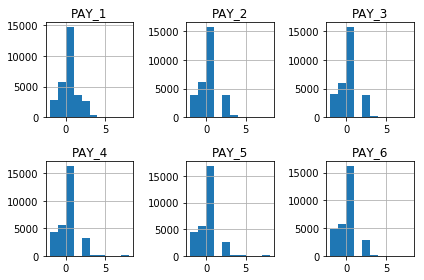

In [27]:
late = fulldata[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)


In [28]:
#making the values in PAY_number meaningful by removing the negative values in it

fil = (fulldata.PAY_1 ==-2) | (fulldata.PAY_1 ==-1) | (fulldata.PAY_1 ==0)
fulldata.loc[fil, 'PAY_1'] =0

fil = (fulldata.PAY_2 ==-2) | (fulldata.PAY_2 ==-1) | (fulldata.PAY_2 ==0)
fulldata.loc[fil, 'PAY_2'] =0

fil = (fulldata.PAY_3 ==-2) | (fulldata.PAY_3 == -1) | (fulldata.PAY_3 ==0)
fulldata.loc[fil, 'PAY_3'] =0


fil = (fulldata.PAY_4 ==-2) | (fulldata.PAY_4 ==-1) | (fulldata.PAY_4 ==0)
fulldata.loc[fil, 'PAY_4'] =0


fil = (fulldata.PAY_5 ==-2) | (fulldata.PAY_5 == -1) | (fulldata.PAY_5 ==0)
fulldata.loc[fil, 'PAY_5'] =0


fil = (fulldata.PAY_6 ==-2) | (fulldata.PAY_6== -1) | (fulldata.PAY_6 ==0)
fulldata.loc[fil, 'PAY_6'] =0


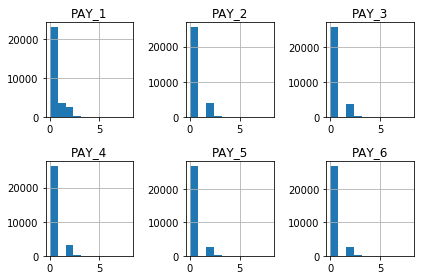

In [29]:
late = fulldata[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

In [31]:
fulldata.sample(10)

,CUSTOMER_NUM,COVERAGE_AMOUNT,GENDER,MARRIAGE,STATE,INSURANCE_TYPE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
19486,31141.0,130000.0,Male,Married,California,LongTerm care,27.0,1.0,0.0,0.0,0.0,0.0,0.0,-24.0,-350.0,30656.0,29426.0,29100.0,-1410.0,326.0,32100.0,0.0,0.0,0.0,0.0,1.0
15068,26179.0,160000.0,Male,Single,Colorado,Dental,38.0,0.0,0.0,0.0,0.0,0.0,0.0,5207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,0.0
26225,37336.0,600000.0,Male,Married,Texas,Vision,51.0,0.0,0.0,0.0,0.0,0.0,0.0,95286.0,78404.0,147559.0,323129.0,310042.0,311840.0,10448.0,85113.0,217035.0,11032.0,15019.0,10033.0,0.0
19644,31299.0,60000.0,Male,Married,Texas,AccidentalDeath,24.0,0.0,0.0,0.0,0.0,0.0,0.0,57771.0,53334.0,0.0,41645.0,41833.0,41481.0,2336.0,1414.0,0.0,2000.0,1503.0,3200.0,0.0
23588,34699.0,180000.0,Female,Single,California,Dental,65.0,0.0,0.0,0.0,0.0,0.0,0.0,191309.0,174775.0,174702.0,176816.0,180911.0,123229.0,175100.0,7000.0,5000.0,5309.0,5288.0,3000.0,1.0
29815,40926.0,210000.0,Female,Married,New York,Vision,35.0,0.0,0.0,0.0,0.0,0.0,0.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0.0
3437,14548.0,290000.0,Male,Single,Colorado,Dental,49.0,0.0,0.0,0.0,0.0,0.0,0.0,169004.0,166920.0,153092.0,3804.0,155233.0,148003.0,7600.0,7521.0,3804.0,160897.0,5198.0,6000.0,0.0
7320,18431.0,240000.0,Male,Married,Texas,Dental,42.0,0.0,0.0,0.0,0.0,0.0,0.0,3328.0,164327.0,10690.0,4772.0,1294.0,2147.0,164820.0,11728.0,7738.0,1297.0,2153.0,2073.0,0.0
17699,28810.0,80000.0,Male,Single,Colorado,AccidentalDeath,45.0,0.0,0.0,0.0,2.0,2.0,3.0,2516.0,0.0,1890.0,1712.0,4180.0,3820.0,0.0,1890.0,0.0,2523.0,0.0,0.0,0.0
5631,16742.0,200000.0,Female,Married,Texas,Dental,27.0,0.0,0.0,0.0,0.0,0.0,0.0,60225.0,61040.0,32298.0,31046.0,21581.0,16001.0,4119.0,5000.0,3037.0,3025.0,3035.0,3000.0,0.0


In [17]:
fulldata['out_bal_apr'] = ((fulldata['BILL_AMT5'] - (fulldata['BILL_AMT6'] - fulldata['PAY_AMT5'])))

fulldata['out_bal_may'] = (fulldata['out_bal_apr'] +(fulldata['BILL_AMT4'] - (fulldata['BILL_AMT5'] - fulldata['PAY_AMT4'])))

fulldata['out_bal_june'] = fulldata['out_bal_may']+(fulldata['BILL_AMT3'] - (fulldata['BILL_AMT4'] - fulldata['PAY_AMT3']))

fulldata['out_bal_july'] =fulldata['out_bal_june']+ (fulldata['BILL_AMT2'] - (fulldata['BILL_AMT3'] - fulldata['PAY_AMT2']))
fulldata['out_bal_aug'] =fulldata['out_bal_july']+ (fulldata['BILL_AMT1'] - (fulldata['BILL_AMT2'] - fulldata['PAY_AMT1']))

In [18]:
fulldata['out_bucket']='0'
fulldata.out_bucket.value_counts()

0    30000
Name: out_bucket, dtype: int64

In [19]:
fulldata.loc[fulldata['out_bal_aug']<=0, 'out_bucket']=1
fulldata.loc[((fulldata['out_bal_aug']>0)&(fulldata['out_bal_aug']<1000)),'out_bucket']=2
fulldata.loc[((fulldata['out_bal_aug']>=1000)&(fulldata['out_bal_aug']<5000)),'out_bucket']=3
fulldata.loc[((fulldata['out_bal_aug']>=5000)&(fulldata['out_bal_aug']<10000)),'out_bucket']=4
fulldata.loc[((fulldata['out_bal_aug']>=10000)&(fulldata['out_bal_aug']<25000)),'out_bucket']=5
fulldata.loc[((fulldata['out_bal_aug']>=25000)&(fulldata['out_bal_aug']<50000)),'out_bucket']=6
fulldata.loc[((fulldata['out_bal_aug']>=50000)&(fulldata['out_bal_aug']<100000)),'out_bucket']=7
fulldata.loc[(fulldata['out_bal_aug']>=100000),'out_bucket']=8
fulldata.out_bucket.value_counts()

5    6126
6    5718
3    5642
7    4187
4    3652
8    2800
1    1210
2     665
Name: out_bucket, dtype: int64

In [20]:

import pandas as pd
out_names= fulldata['out_bucket'].value_counts(sort=False,ascending=False).keys().tolist()

out_counts = fulldata['out_bucket'].value_counts(sort=False, ascending=False).tolist()

[Text(0,0,'0\\$'),
 Text(0,0,'1\\$-50\\$'),
 Text(0,0,'50\\$ to 100\\$'),
 Text(0,0,'100\\$ to 250\\$'),
 Text(0,0,'250\\$ to 500\\$'),
 Text(0,0,'500\\$ to 750\\$'),
 Text(0,0,'750\\$ to 1000\\$'),
 Text(0,0,'>1000\\$')]

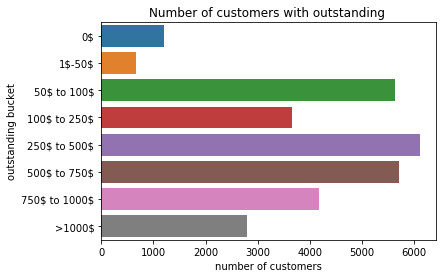

In [44]:
out_names_alias=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
out_counts_alias=[out_counts[0],out_counts[1],out_counts[2],out_counts[3],out_counts[4],out_counts[5],out_counts[6],out_counts[7]]
plt.xlabel('number of customers')
plt.ylabel('outstanding bucket')
plt.title('Number of customers with outstanding ')
ax = sns.barplot(x = out_counts_alias, y = out_names_alias)
ax.set_yticklabels(['0\$',"1\$-50\$",'50\$ to 100\$','100\$ to 250\$','250\$ to 500\$','500\$ to 750\$','750\$ to 1000\$','>1000\$'])

In [49]:
fulldata['AgeBin'] =0 #creates a column of 0
fulldata.loc[((fulldata['AGE'] > 20) & (fulldata['AGE'] < 30)) , 'AgeBin'] = 1
fulldata.loc[((fulldata['AGE'] >= 30) & (fulldata['AGE'] < 40)) , 'AgeBin'] = 2
fulldata.loc[((fulldata['AGE'] >= 40) & (fulldata['AGE'] < 50)) , 'AgeBin'] = 3
fulldata.loc[((fulldata['AGE'] >= 50) & (fulldata['AGE'] < 60)) , 'AgeBin'] = 4
fulldata.loc[((fulldata['AGE'] >= 60) & (fulldata['AGE'] < 70)) , 'AgeBin'] = 5
fulldata.loc[((fulldata['AGE'] >= 70) & (fulldata['AGE'] < 81)) , 'AgeBin'] = 6

In [50]:
out_names_age= fulldata['AgeBin'].value_counts(sort=False,ascending=False).keys().tolist()

out_counts_age = fulldata['AgeBin'].value_counts(sort=False, ascending=False).tolist()

[Text(0,0,'20 to 30'),
 Text(0,0,'30 to 40'),
 Text(0,0,'40 to 50'),
 Text(0,0,'50 to 60'),
 Text(0,0,'60 to 70'),
 Text(0,0,'70 to 81')]

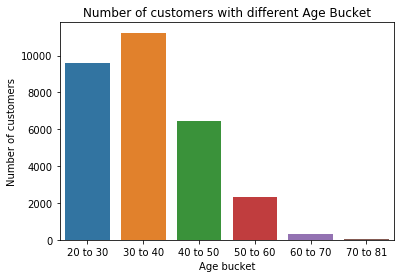

In [51]:
out_names_age_alias=['20 to 30','30 to 40','40 to 50','50 to 60','60 to 70','70 to 81']
out_counts_age_alias=[out_counts_age[0],out_counts_age[1],out_counts_age[2],out_counts_age[3],out_counts_age[4],out_counts_age[5]]
plt.xlabel('Age bucket')
plt.ylabel('Number of customers')
plt.title('Number of customers with different Age Bucket')
ax = sns.barplot(x = out_names_age_alias, y = out_counts_age_alias)
ax.set_xticklabels(['20 to 30','30 to 40','40 to 50','50 to 60','60 to 70','70 to 81'])

In [52]:

def corr_2_cols(Col1, Col2):
    res = fulldata.groupby([Col1, Col2]).size().unstack()
    #res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [57]:
corr_2_cols('AgeBin','DEFAULTER')

DEFAULTER,0.0,1.0
AgeBin,,
1,7421,2197
2,8962,2276
3,4979,1485
4,1759,582
5,225,89
6,18,7


Text(0.5,1,'Heatmap of Defaulter and AgeBin')

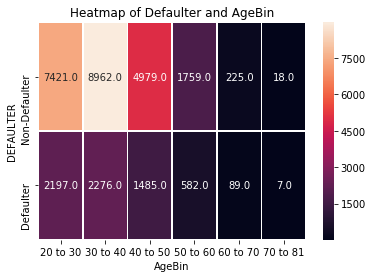

In [58]:
lab=['20 to 30','30 to 40','40 to 50','50 to 60','60 to 70','70 to 81']
lab2=['Non-Defaulter','Defaulter']
age_defaulter=corr_2_cols('DEFAULTER', 'AgeBin')
r=sns.heatmap(age_defaulter,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2,linewidths=.5)
r.set_title("Heatmap of Defaulter and AgeBin")

Text(0.5,1,'Heatmap of Outstanding Balance and AgeBin')

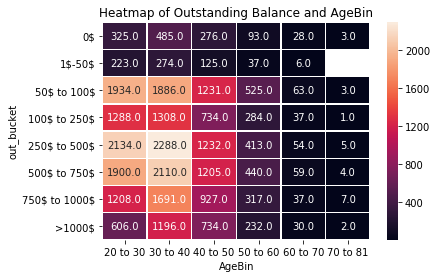

In [59]:
lab=['20 to 30','30 to 40','40 to 50','50 to 60','60 to 70','70 to 81']
lab2=['0\$',"1\$-50\$",'50\$ to 100\$','100\$ to 250\$','250\$ to 500\$','500\$ to 750\$','750\$ to 1000\$','>1000\$']
age_outstanding=corr_2_cols('out_bucket', 'AgeBin')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2,linewidths=.5)
r.set_title("Heatmap of Outstanding Balance and AgeBin")

# Building Model to find defaulter

In [44]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [45]:
fulldata.sample(2)

,CUSTOMER_NUM,COVERAGE_AMOUNT,GENDER,MARRIAGE,STATE,INSURANCE_TYPE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER,out_bal_apr,out_bal_may,out_bal_june,out_bal_july,out_bal_aug,out_bucket,AgeBin
9666,22137.0,240000.0,Male,Married,California,LongTerm care,28.0,0.0,0.0,0.0,0.0,0.0,0.0,188956.0,189678.0,189471.0,191623.0,195624.0,199259.0,7200.0,7500.0,6300.0,6000.0,6100.0,6000.0,0.0,2465.0,4464.0,8612.0,16319.0,22797.0,5,1
1153,12264.0,150000.0,Male,Married,California,LongTerm care,30.0,0.0,0.0,0.0,0.0,0.0,0.0,10705.0,5416.0,5162.0,4068.0,249.0,249.0,1000.0,5162.0,1000.0,249.0,249.0,5565.0,0.0,249.0,4317.0,6411.0,11827.0,18116.0,5,2


In [46]:
features = ['CUSTOMER_NUM','COVERAGE_AMOUNT', 'PAY_1','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'out_bucket'
            , 'AgeBin','out_bal_apr','out_bal_may','out_bal_june','out_bal_july','out_bal_aug',
            ]
y = fulldata['DEFAULTER'].copy() # target
X = fulldata[features].copy()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [47]:

df_train=x_train.join(y_train)
df_train.head()

,CUSTOMER_NUM,COVERAGE_AMOUNT,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,out_bucket,AgeBin,out_bal_apr,out_bal_may,out_bal_june,out_bal_july,out_bal_aug,DEFAULTER
21753,33408.0,90000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,0.0,0.0,0.0,0.0,0.0,0.0
251,11362.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,29242.0,29507.0,29155.0,25255.0,22001.0,0.0,5006.0,1244.0,851.0,955.0,0.0,0.0,6,1,22001.0,26210.0,30961.0,32557.0,37298.0,0.0
22941,34052.0,200000.0,0.0,0.0,0.0,2.0,0.0,0.0,9228.0,7532.0,7246.0,3506.0,2376.0,123687.0,2100.0,3320.0,0.0,2400.0,127187.0,2187.0,5,1,5876.0,9406.0,13146.0,16752.0,20548.0,0.0
618,11729.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,58839.0,53235.0,38533.0,39639.0,39619.0,39140.0,2018.0,1900.0,2000.0,1500.0,1900.0,2000.0,6,1,2379.0,3899.0,4793.0,21395.0,29017.0,0.0
17090,28201.0,150000.0,0.0,0.0,0.0,0.0,0.0,0.0,105416.0,106773.0,106500.0,104670.0,55442.0,55936.0,5800.0,4648.0,2000.0,2889.0,2700.0,94000.0,7,3,2206.0,54323.0,58153.0,63074.0,67517.0,0.0


In [48]:

df_test=x_test.join(y_test)
df_test.head()

,CUSTOMER_NUM,COVERAGE_AMOUNT,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,out_bucket,AgeBin,out_bal_apr,out_bal_may,out_bal_june,out_bal_july,out_bal_aug,DEFAULTER
2308,13419.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,8864.0,10062.0,11581.0,12580.0,13716.0,14828.0,1500.0,2000.0,1500.0,1500.0,1500.0,2000.0,3,1,388.0,752.0,1253.0,1734.0,2036.0,0.0
22404,29979.0,420000.0,0.0,0.0,0.0,0.0,0.0,0.0,45060.0,25056.0,24751.0,24984.0,24983.0,23751.0,1407.0,1332.0,963.0,877.0,1000.0,908.0,6,2,2232.0,3110.0,3840.0,5477.0,26888.0,1.0
23397,34508.0,180000.0,0.0,0.0,0.0,2.0,0.0,0.0,3229.0,0.0,6709.0,6366.0,1950.0,1931.0,0.0,6709.0,0.0,1950.0,1931.0,16486.0,5,2,1950.0,8316.0,8659.0,8659.0,11888.0,0.0
25058,36169.0,260000.0,0.0,0.0,0.0,2.0,0.0,0.0,157551.0,160759.0,351026.0,170671.0,169689.0,159066.0,7312.0,18934.0,23.0,3729.0,4226.0,514.0,6,3,14849.0,19560.0,199938.0,28605.0,32709.0,0.0
2664,13775.0,50000.0,0.0,0.0,0.0,0.0,0.0,2.0,94228.0,47635.0,42361.0,19574.0,20295.0,19439.0,2000.0,1500.0,1000.0,1800.0,0.0,1000.0,7,2,856.0,1935.0,25722.0,32496.0,81089.0,1.0


In [49]:
df_majority = df_train[df_train.DEFAULTER==0]
df_minority = df_train[df_train.DEFAULTER==1]

print(df_majority.DEFAULTER.count())
print("-----------")
print(df_minority.DEFAULTER.count())
print("-----------")
print(df_train.DEFAULTER.value_counts())

18730
-----------
5270
-----------
0.0    18730
1.0     5270
Name: DEFAULTER, dtype: int64


In [50]:
#UPSAMPLING DATA

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=18701,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.DEFAULTER.value_counts()

0.0    18730
1.0    18701
Name: DEFAULTER, dtype: int64

In [51]:
#DOWNSAMPLING DATA
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5299,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.DEFAULTER.value_counts()

0.0    5299
1.0    5270
Name: DEFAULTER, dtype: int64

In [52]:
from pylab import pcolor, show, colorbar, xticks, yticks
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import sklearn.svm as svm
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn import preprocessing,svm,neighbors
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from subprocess import check_output

In [53]:

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 27)
(6000, 27)
(24000,)
(6000,)


In [54]:
from sklearn import tree
clfs = {
'GaussianNB': GaussianNB(),
    
'RandomForest': RandomForestClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'SVM': SVC(),
'KNeighborsClassifier': KNeighborsClassifier(),
'GradientBoosting': GradientBoostingClassifier(),
}

In [55]:

models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    y_score = clf.score(x_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Accuracy
0,GaussianNB,0.260832,0.890190,0.403451,0.400667
1,RandomForest,0.629683,0.319912,0.424272,0.802333
2,DecisionTreeClassifier,0.385263,0.401903,0.393407,0.717833
3,SVM,0.000000,0.000000,0.000000,0.772333
4,KNeighborsClassifier,0.370192,0.169107,0.232161,0.745333
5,GradientBoosting,0.694181,0.375549,0.487411,0.820167


In [56]:
fulldata.head()

,CUSTOMER_NUM,COVERAGE_AMOUNT,GENDER,MARRIAGE,STATE,INSURANCE_TYPE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER,out_bal_apr,out_bal_may,out_bal_june,out_bal_july,out_bal_aug,out_bucket,AgeBin
0,11111.0,20000.0,Male,Single,Michigan,Health,24.0,2.0,2.0,0.0,0.0,0.0,0.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,689.0,3791.0,4602.0,3,1
1,11112.0,120000.0,Male,Married,Texas,AccidentalDeath,26.0,0.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,194.0,1011.0,1421.0,1464.0,2421.0,3,1
2,11113.0,90000.0,Male,Married,Texas,AccidentalDeath,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,399.0,782.0,1010.0,2978.0,19708.0,5,2
3,11114.0,50000.0,Male,Single,Michigan,Health,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,481.0,936.0,23113.0,24074.0,24831.0,5,2
4,11115.0,50000.0,Female,Single,Nevada,Health,57.0,0.0,0.0,0.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,704.0,11498.0,36393.0,42909.0,47856.0,6,4


In [57]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [58]:
def gridsearch(model, params,x_train, x_test, y_train, y_test, kfold):
    gs = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=kfold)
    gs.fit(x_train, y_train)
    print ('Best params: ', gs.best_params_)
    print ('Best AUC on Train set: ', gs.best_score_)
    print ('Best AUC on Test set: ', gs.score(x_test, y_test))

# Function to generate confusion matrix
def confmat(pred, y_test):
    conmat = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
    conf = pd.DataFrame(conmat, index=['Defaulter', 'Not Defaulter'],
                             columns=['Predicted Defaulter', 'Predicted Not Defaulter'])
    print (conf)

# Function to plot roc curve
def roc(prob, y_test):
    y_score = prob
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
    roc_auc[1] = auc(fpr[1], tpr[1])
    plt.figure(figsize=[7,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive rate', fontsize=15)
    plt.ylabel('True Positive rate', fontsize=15)
    plt.title('ROC curve for Credit Default', fontsize=16)
    plt.legend(loc='Lower Right')
    plt.show()
    
def model(md, x_train, y_train,x_test, y_test):
    md.fit(x_train, y_train)
    pred = md.predict(x_test)
    prob = md.predict_proba(x_test)[:,1]
    print (' ') 
    print ('Accuracy on Train set: ', md.score(x_train, y_train))
    print ('Accuracy on Test set: ', md.score(x_test, y_test))
    print (' ')
    print(classification_report(y_test, pred))
    print (' ')
    print ('Confusion Matrix')
    confmat(pred, y_test)
    print('ACCURACY: ', accuracy_score(y_test, pred),' or ',round(accuracy_score(y_test, pred)*100,2),'%')
    threshold = 0.5
    y_train_pred = md.predict_proba(x_train)[:,1]
    

    fig,ax = plt.subplots(1,2)
    fig.set_size_inches(10,5)

    plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
    plot_cm(ax[1],  y_test, prob,   [0,1], 'Confusion matrix (TEST)', threshold)
    roc(prob, y_test)
  
    return md

In [59]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix
def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

In [60]:
gb = GradientBoostingClassifier()
gb_params = {'n_estimators': [100,200,300],'learning_rate' : [0.01, 0.02, 0.05, 0.1]}

 
Accuracy on Train set:  0.86725
Accuracy on Test set:  0.8195
 
             precision    recall  f1-score   support

        0.0       0.84      0.95      0.89      4634
        1.0       0.69      0.38      0.49      1366

avg / total       0.80      0.82      0.80      6000

 
Confusion Matrix
               Predicted Defaulter  Predicted Not Defaulter
Defaulter                      520                      846
Not Defaulter                  237                     4397
ACCURACY:  0.8195  or  81.95 %


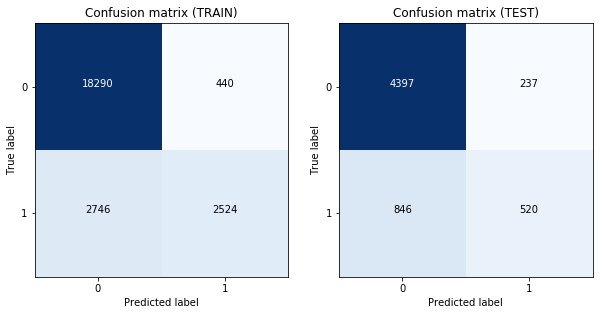

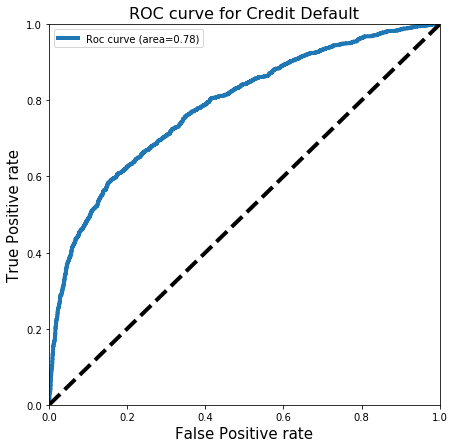

In [61]:
gb = GradientBoostingClassifier(learning_rate= 0.02, max_depth= 7,n_estimators=300, max_features = 0.9,min_samples_leaf = 5)
model_gb = model(gb, x_train, y_train,x_test, y_test)

In [62]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
x_up = df_upsampled.drop(['DEFAULTER'],axis = 1)
y_up = df_upsampled.DEFAULTER

# rescale the metrics to the same mean and standard deviation
scaler = preprocessing.StandardScaler()
x = scaler.fit(x_up).transform(x_up)

# Further divide the train data into train test 
x_train_up, x_test_up, y_train_up, y_test_up = train_test_split(x_up, y_up, test_size=0.1, stratify=y, random_state=2)

In [63]:
df_test_up=x_test_up.join(y_test_up)
df_test_up.head()

,CUSTOMER_NUM,COVERAGE_AMOUNT,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,out_bucket,AgeBin,out_bal_apr,out_bal_may,out_bal_june,out_bal_july,out_bal_aug,DEFAULTER
23,11134.0,450000.0,0.0,0.0,0.0,0.0,0.0,0.0,5512.0,19420.0,1473.0,560.0,0.0,0.0,19428.0,1473.0,560.0,0.0,0.0,1128.0,6,3,0.0,560.0,2033.0,21453.0,26973.0,1.0
23,11134.0,450000.0,0.0,0.0,0.0,0.0,0.0,0.0,5512.0,19420.0,1473.0,560.0,0.0,0.0,19428.0,1473.0,560.0,0.0,0.0,1128.0,6,3,0.0,560.0,2033.0,21453.0,26973.0,1.0
23,11134.0,450000.0,0.0,0.0,0.0,0.0,0.0,0.0,5512.0,19420.0,1473.0,560.0,0.0,0.0,19428.0,1473.0,560.0,0.0,0.0,1128.0,6,3,0.0,560.0,2033.0,21453.0,26973.0,1.0
23,11134.0,450000.0,0.0,0.0,0.0,0.0,0.0,0.0,5512.0,19420.0,1473.0,560.0,0.0,0.0,19428.0,1473.0,560.0,0.0,0.0,1128.0,6,3,0.0,560.0,2033.0,21453.0,26973.0,1.0
39,11150.0,280000.0,0.0,0.0,2.0,0.0,0.0,0.0,498.0,9075.0,4641.0,9976.0,17976.0,9477.0,9075.0,0.0,9976.0,8000.0,9525.0,781.0,6,2,18024.0,18024.0,22665.0,27099.0,27597.0,0.0


In [64]:
print(x_train_up.shape)
print(x_test_up.shape)
print(y_train_up.shape)
print(y_test_up.shape)

(27000, 27)
(3000, 27)
(27000,)
(3000,)


In [65]:

from sklearn import tree
clfs = {

'RandomForest': RandomForestClassifier(),

'GradientBoosting': GradientBoostingClassifier(),
}

In [66]:
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train_up,y_train_up)
    y_pred = clf.predict(x_test_up)
    y_score = clf.score(x_test_up,y_test_up)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test_up, y_pred),
                     'Recall_score': metrics.recall_score(y_test_up, y_pred),
                     'F1_score': metrics.f1_score(y_test_up, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test_up, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Accuracy
0,RandomForest,0.862979,0.887916,0.875270,0.903667
1,GradientBoosting,0.731586,0.513135,0.603191,0.743000


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier

from sklearn.metrics import f1_score

In [68]:
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini'], 'n_jobs' : [-1]}

In [69]:
acc_scorer = make_scorer(f1_score)

In [70]:
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)

In [71]:

def forest(model, params,x_train, x_test, y_train, y_test, kfold):
    grid_forest= GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=kfold)
    grid_forest.fit(x_train, y_train)
    print ('Best params: ', grid_forest.best_params_)
    print ('Best AUC on Train set: ', grid_forest.best_score_)
    print ('Best AUC on Test set: ', grid_forest.score(x_test, y_test))

In [72]:
def confmat_forest(pred, y_test):
    conmat = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
    conf = pd.DataFrame(conmat, index=['Defaulter', 'Not Defaulter'],
                             columns=['Predicted Defaulter', 'Predicted Not Defaulter'])
    print(conf)

In [73]:

def roc_forest(prob, y_test):
    y_score = prob
    fpr = dict()
    tpr = dict()
    

    
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
    roc_auc[1] = auc(fpr[1], tpr[1])
    plt.figure(figsize=[7,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive rate', fontsize=15)
    plt.ylabel('True Positive rate', fontsize=15)
    plt.title('ROC curve for Credit Default', fontsize=16)
    plt.legend(loc='Lower Right')
    plt.show()

In [74]:
def model_rd(md, x_train, y_train,x_test, y_test):
    md.fit(x_train, y_train)
    pred = md.predict(x_test)
    prob = md.predict_proba(x_test)[:,1]
    print (' ') 
    print ('Accuracy on Train set: ', md.score(x_train, y_train))
    print ('Accuracy on Test set: ', md.score(x_test, y_test))
    print (' ')
    print(classification_report(y_test, pred))
    print (' ')
    print ('Confusion Matrix')
    confmat_forest(pred, y_test)
    print(' ')
    print('ACCURACY: ', accuracy_score(y_test, pred),' or ',round(accuracy_score(y_test, pred)*100,2),'%')
    threshold = 0.5
    y_train_pred = md.predict_proba(x_train)[:,1]
    

    fig,ax = plt.subplots(1,2)
    fig.set_size_inches(15,5)

    plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
    plot_cm(ax[1],  y_test, prob,   [0,1], 'Confusion matrix (TEST)', threshold)
    roc_forest(prob, y_test)
    return md

 
Accuracy on Train set:  1.0
Accuracy on Test set:  0.9216666666666666
 
             precision    recall  f1-score   support

        0.0       0.95      0.92      0.94      1858
        1.0       0.88      0.92      0.90      1142

avg / total       0.92      0.92      0.92      3000

 
Confusion Matrix
               Predicted Defaulter  Predicted Not Defaulter
Defaulter                     1049                       93
Not Defaulter                  142                     1716
 
ACCURACY:  0.9216666666666666  or  92.17 %


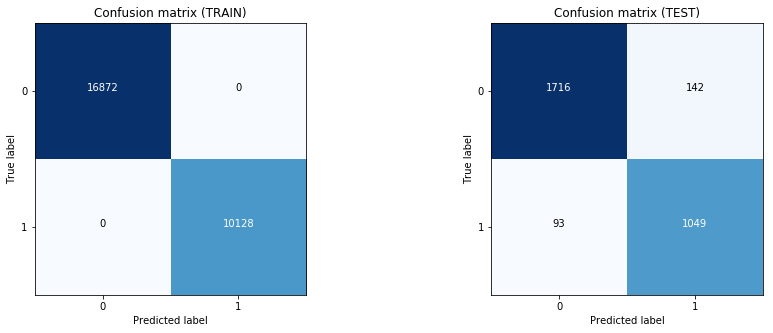

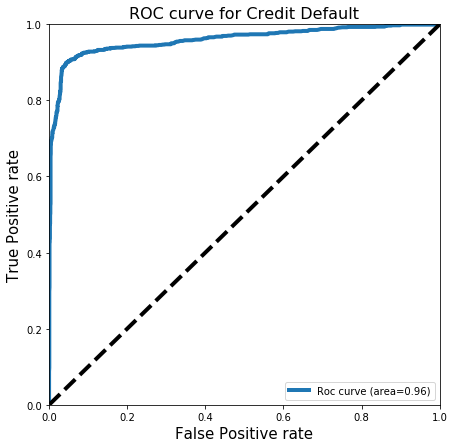

In [75]:
#rf = RandomForestClassifier(max_depth=7,n_estimators=300,max_features=0.9,min_samples_leaf=5)
rf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_split=0.0001,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=600, verbose=0,
            warm_start=False)
rf.fit(x_train_up,y_train_up)

model_rf = model_rd(rf, x_train_up, y_train_up,x_test_up, y_test_up)

In [76]:
probab =model_rf.predict_proba(x_test_up)[:,1]

pro = pd.DataFrame({'Probability':probab*100})

In [77]:
pred=model_rf.predict(x_test_up)
pre = pd.DataFrame({'Prediction':pred})

In [78]:
default = pd.DataFrame({'Defaulters':y_test_up})

In [79]:

x_test_up.reset_index(drop=True, inplace=True)
pro.reset_index(drop=True, inplace=True)
pre.reset_index(drop=True, inplace=True)
default.reset_index(drop=True, inplace=True)

result = pd.concat( [x_test_up,default,pro,pre], axis=1)

In [80]:
result.sample(20)

,CUSTOMER_NUM,COVERAGE_AMOUNT,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,out_bucket,AgeBin,out_bal_apr,out_bal_may,out_bal_june,out_bal_july,out_bal_aug,Defaulters,Probability,Prediction
2401,31779.0,20000.0,1.0,2.0,2.0,2.0,3.0,2.0,12961.0,13668.0,13145.0,15023.0,14510.0,13854.0,1209.0,0.0,2087.0,0.0,550.0,0.0,3,5,1206.0,1719.0,1928.0,2451.0,2953.0,1.0,92.2,1.0
22,13434.0,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,46927.0,40000.0,0.0,0.0,0.0,0.0,4000.0,0.0,0.0,0.0,0.0,85000.0,7,2,0.0,0.0,0.0,40000.0,50927.0,0.0,18.9,0.0
1890,26180.0,230000.0,0.0,0.0,0.0,0.0,0.0,0.0,4549.0,0.0,24962.0,34372.0,32630.0,33334.0,0.0,24962.0,10000.0,943.0,1000.0,1058.0,4,2,296.0,2981.0,3571.0,3571.0,8120.0,0.0,22.7,0.0
1541,13290.0,120000.0,0.0,0.0,0.0,0.0,0.0,0.0,102735.0,80762.0,77846.0,77404.0,75056.0,75951.0,3000.0,3000.0,2655.0,2664.0,3000.0,3000.0,6,4,2105.0,7117.0,10214.0,16130.0,41103.0,0.0,7.0,0.0
2879,31469.0,280000.0,0.0,0.0,0.0,0.0,0.0,0.0,211645.0,213513.0,106539.0,106361.0,108590.0,110915.0,6445.0,5245.0,3800.0,3881.0,4069.0,4035.0,8,2,1744.0,3396.0,7374.0,119593.0,124170.0,0.0,13.2,0.0
2448,24470.0,360000.0,0.0,0.0,0.0,0.0,0.0,0.0,30198.0,58332.0,66062.0,57374.0,40963.0,100369.0,30000.0,10043.0,20073.0,30000.0,90000.0,948.0,8,2,30594.0,77005.0,105766.0,108079.0,109945.0,0.0,2.7,0.0
1222,33019.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,-1404.0,73596.0,49800.0,1514.0,41072.0,23500.0,75000.0,49800.0,1514.0,41072.0,23500.0,29702.0,8,3,41072.0,42586.0,92386.0,165982.0,165982.0,0.0,18.4,0.0
607,13261.0,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,31373.0,32155.0,32331.0,29035.0,19576.0,33825.0,1602.0,1451.0,4.0,41.0,34938.0,292.0,6,2,20689.0,30189.0,33489.0,34764.0,35584.0,0.0,20.7,0.0
249,25683.0,280000.0,0.0,0.0,0.0,0.0,0.0,0.0,149312.0,152323.0,155568.0,158775.0,162035.0,165522.0,5500.0,5700.0,5800.0,5900.0,6100.0,6100.0,5,1,2613.0,5253.0,7846.0,10301.0,12790.0,0.0,3.6,0.0
1398,34643.0,100000.0,2.0,2.0,2.0,3.0,2.0,2.0,81507.0,83154.0,88223.0,85924.0,86803.0,88745.0,3900.0,7300.0,0.0,3200.0,3500.0,3420.0,5,4,1558.0,3879.0,6178.0,8409.0,10662.0,1.0,84.6,1.0
